# 1.1 Importing the libraries

Import libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load Dataset

In [2]:
Student_Performance  = pd.read_csv("D:\\data_science_repo\\Student_Performance_Prediction\\SAP-4000.csv")

shows first five rows of a datset

In [3]:
Student_Performance.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


info() provides the information of the dataet.

In [4]:
Student_Performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


isna() shows the null values in each column of the dataset.

In [5]:
Student_Performance.isna().sum()

Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64

### fill null values in Parents Education column

<Axes: xlabel='Parent Education', ylabel='count'>

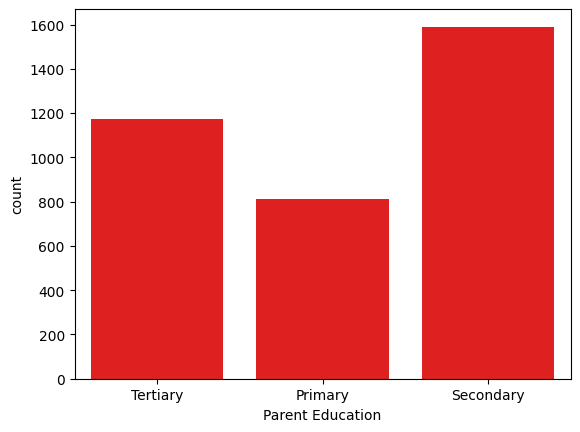

In [6]:
sns.countplot(data = Student_Performance, x='Parent Education', color='red')

In [7]:
Student_Performance['Parent Education'].mode()

0    Secondary
Name: Parent Education, dtype: object

In [8]:
Student_Performance['Parent Education'].fillna('Secondary', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5600\1106744371.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Student_Performance['Parent Education'].fillna('Secondary', inplace=True)


## Exploratory Data Analysis

Visualise the dataset 

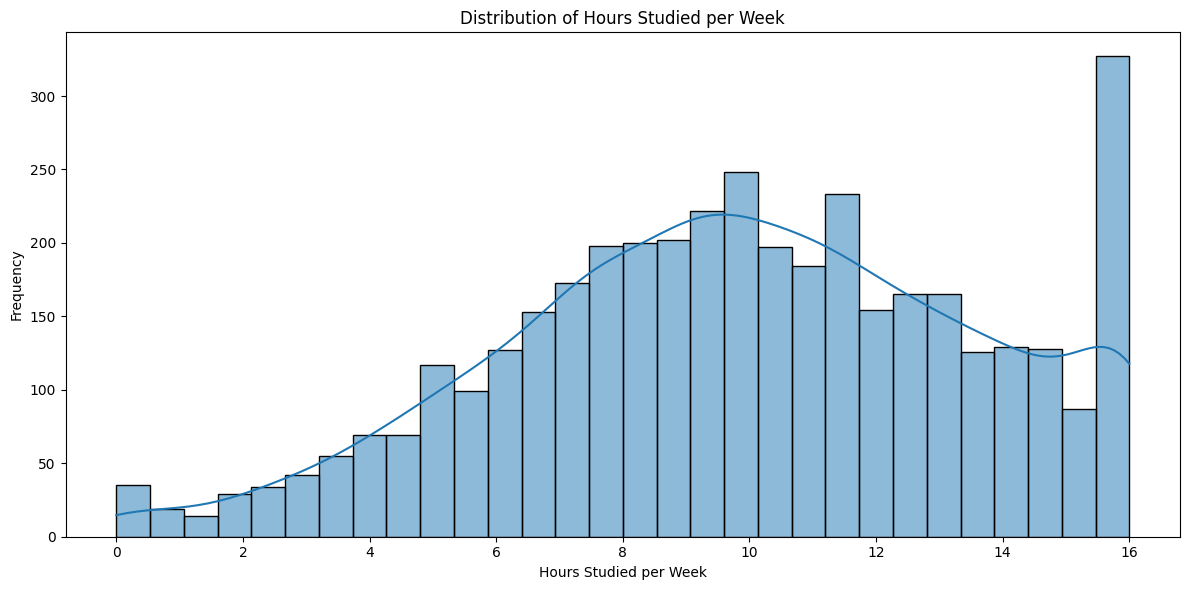

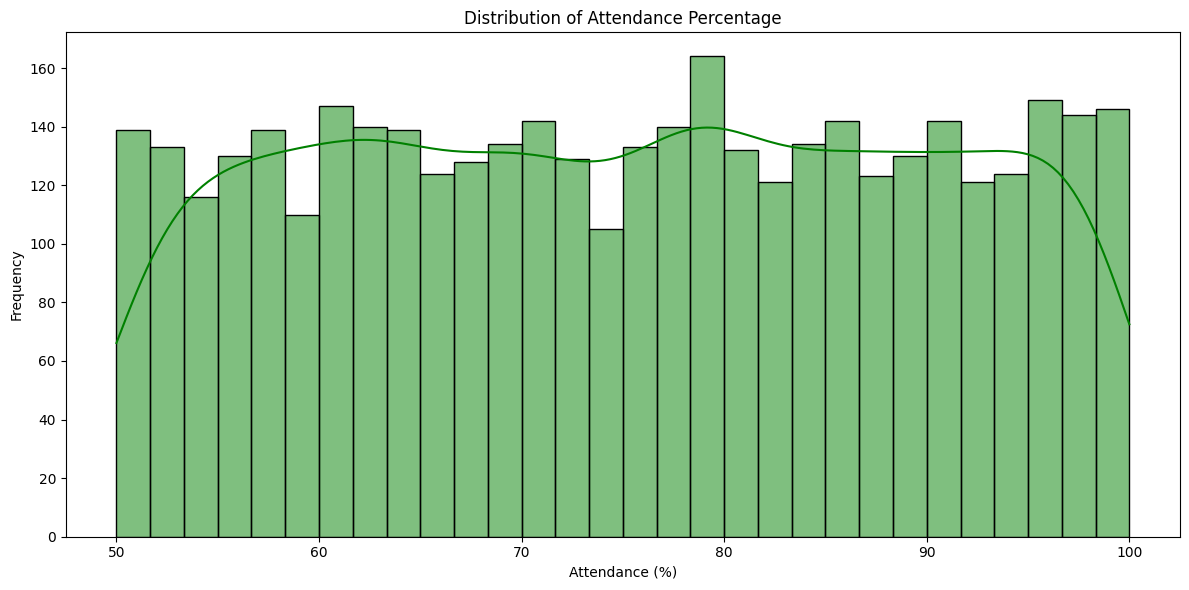

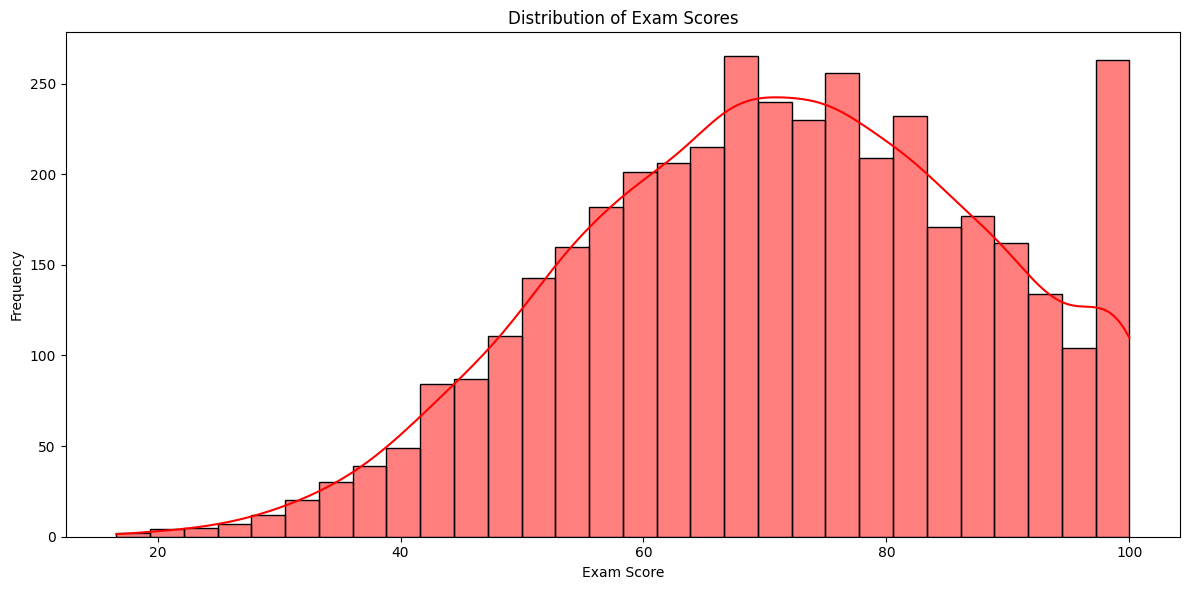

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(Student_Performance['HoursStudied/Week'], kde=True, bins=30)
plt.title('Distribution of Hours Studied per Week')
plt.xlabel('Hours Studied per Week')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('hours_studied_histogram.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(Student_Performance['Attendance(%)'], kde=True, bins=30, color='green')
plt.title('Distribution of Attendance Percentage')
plt.xlabel('Attendance (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('attendance_histogram.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(Student_Performance['Exam_Score'], kde=True, bins=30, color='red')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('exam_score_histogram.png')
plt.show()

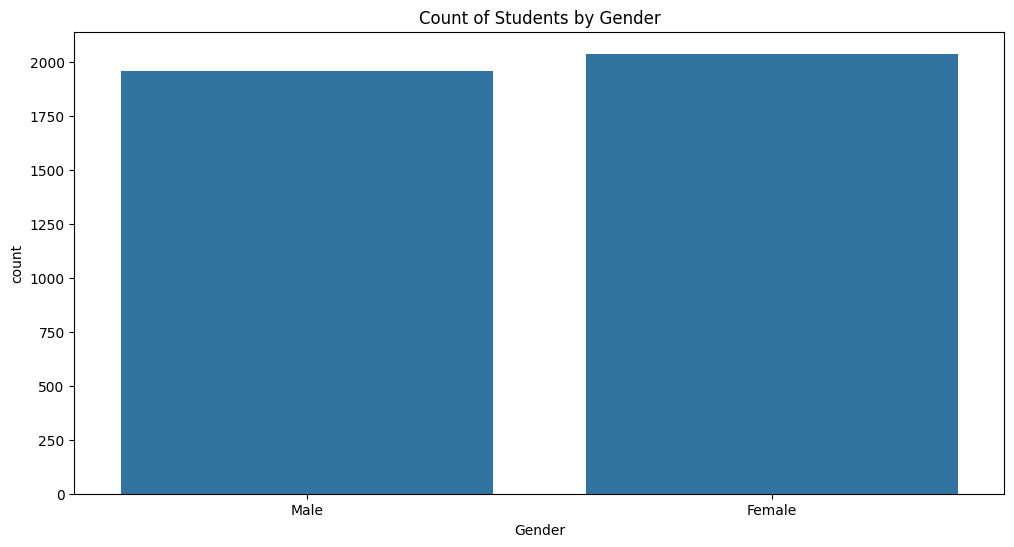

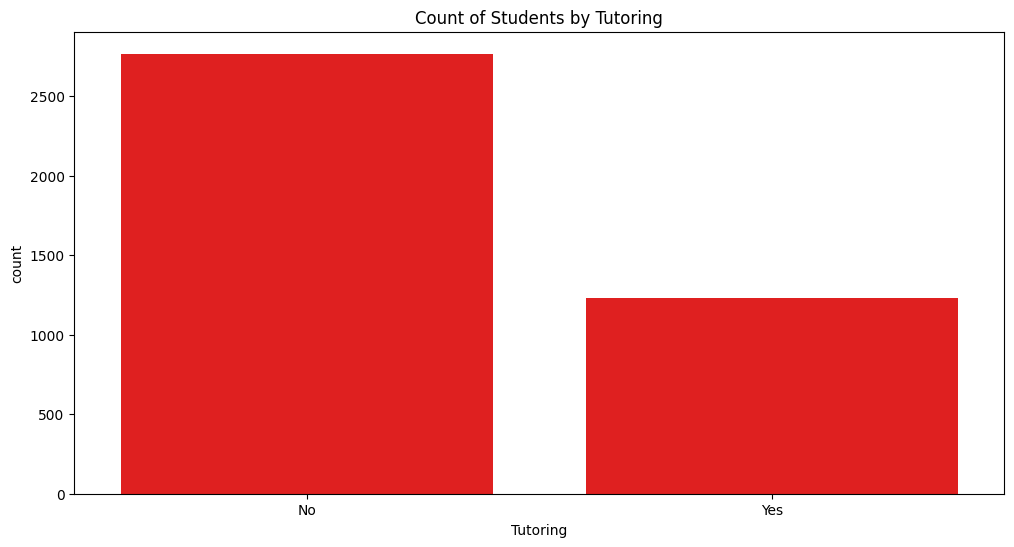

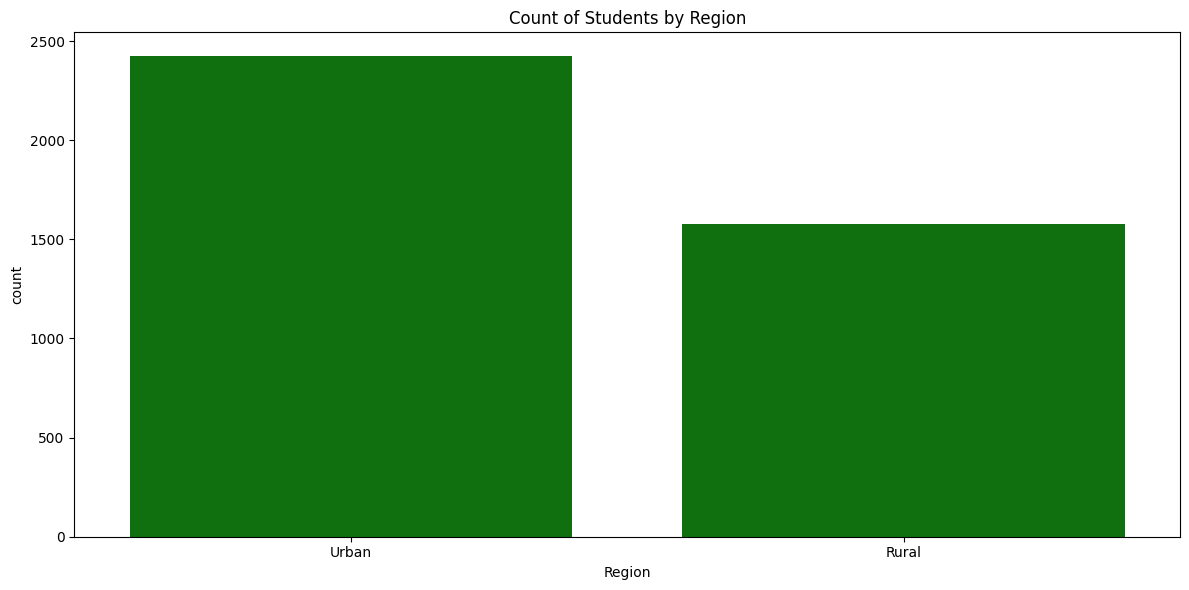

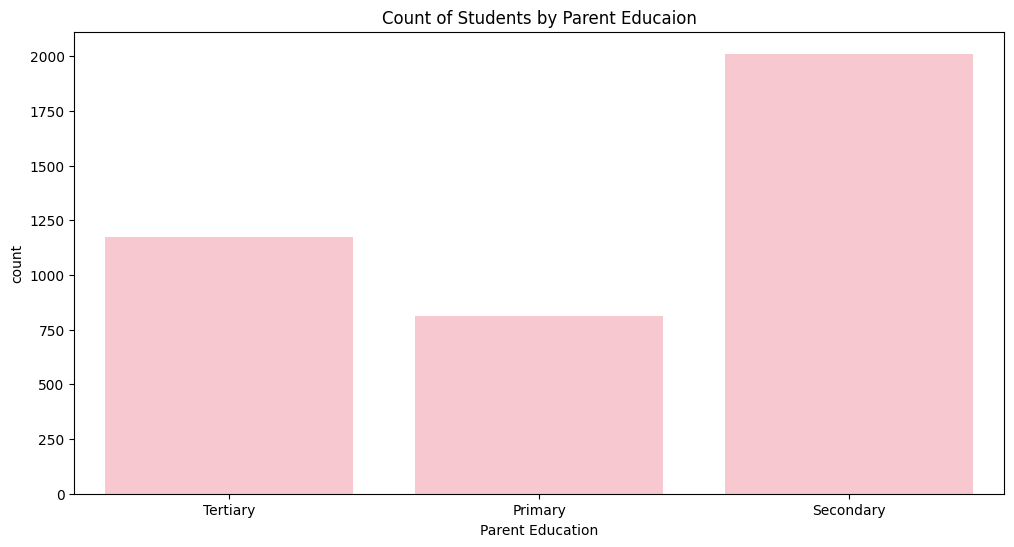

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=Student_Performance, x='Gender')
plt.title('Count of Students by Gender')
plt.xlabel('Gender')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=Student_Performance, x='Tutoring', color='Red')
plt.title('Count of Students by Tutoring')
plt.xlabel('Tutoring')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=Student_Performance, x='Region',color='Green')
plt.title('Count of Students by Region')
plt.tight_layout()
plt.xlabel('Region')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=Student_Performance, x='Parent Education', color='pink')
plt.title('Count of Students by Parent Educaion')
plt.xlabel('Parent Education')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [12]:
cols = ['HoursStudied/Week','Attendance(%)','Exam_Score']

In [13]:
Student_Performance[cols] = scale.fit_transform(Student_Performance[cols])

In [14]:
Student_Performance.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,-1.174422,No,Urban,-0.174138,Tertiary,-1.648535
1,Female,-0.824333,No,Urban,-0.912319,Primary,-1.158891
2,Female,-0.043364,No,Rural,1.364313,Secondary,-0.060177
3,Male,0.926115,Yes,Rural,-1.540118,Secondary,0.501122
4,Female,-0.258804,No,Urban,-1.684994,Secondary,-1.129034


In [15]:
Student_Performance['Region'].unique().sum()

'UrbanRural'

In [16]:
Student_Performance['Gender'] = Student_Performance['Gender'].replace({'Male':1, 'Female':0})
Student_Performance['Region'] = Student_Performance['Region'].replace({'Urban':1, 'Rural':0})
Student_Performance['Parent Education'] = Student_Performance['Parent Education'].replace({'Primary':0, 'Secondary':0, 'Tertiary':2})
Student_Performance['Tutoring'] = Student_Performance['Tutoring'].replace({'No':0, 'Yes':1})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5600\3762894826.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Student_Performance['Gender'] = Student_Performance['Gender'].replace({'Male':1, 'Female':0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5600\3762894826.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Student_Performance['Region'] = Student_Performance['Region'].replace({'Urban':1, 'Rural':0})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5600\3762894826.py:3: FutureWarning: Downcasting behavior in `replace` is dep

In [17]:
Student_Performance.columns

Index(['Gender', 'HoursStudied/Week', 'Tutoring', 'Region', 'Attendance(%)',
       'Parent Education', 'Exam_Score'],
      dtype='object')

In [18]:
X = Student_Performance[['Gender', 'HoursStudied/Week', 'Tutoring', 'Region', 'Attendance(%)',
       'Parent Education']]
y = Student_Performance['Exam_Score']

## Predictive Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [21]:
linear_regression = LinearRegression()


In [22]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = linear_regression.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.9155380430035659

In [25]:
mean_squared_error(y_test, y_pred)

np.float64(0.0901457480894659)

In [26]:
from sklearn.svm import SVR

In [27]:
svr = SVR()

In [28]:
svr.fit(X_train,y_train)

SVR()

In [29]:
y_svr = svr.predict(X_test)

In [30]:
r2_score(y_test, y_svr)

0.9150472304107143

In [31]:
mean_squared_error(y_test, y_svr)

np.float64(0.09066958947235264)

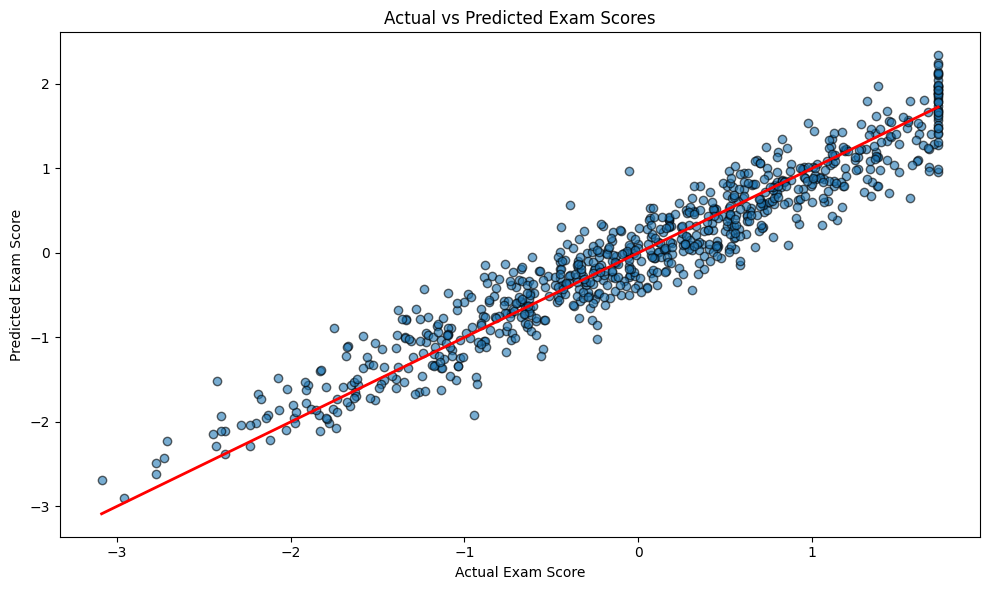

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # identity line
plt.tight_layout()
plt.savefig('actual_vs_predicted.png')
plt.show()

In [33]:
import pickle 
pickle.dump(linear_regression, open('model.pkl','wb'))

In [34]:
for i in X_train:
    print(X_train[i][0])

1
-1.1744222272787113
0
1
-0.1741382346218919
2
